$\newcommand{\ket}[1]{\left|#1\right>}$

# Qubits and superposition

Everything here is taken from the IBM quantum computing User Guide and introduction to quantum computing:

https://quantum-computing.ibm.com/docs/guide/wwwq/creating-superpositions

All the following examples need the Qiskit library to run. Install it running the command:

    pip install qiskit

## The qubit

The quantum bit, or qubit, is the fundamental piece of a quantum computer.

It can be considered as the analogous of the bit in a standard computer, but with the difference that while a bit can assume values 0 or 1, a qubit has two levels $\ket{0}$ and $\ket{1}$ and can be in any state which is the linear superposition of $\ket{0}$ and $\ket{1}$.

On a quantum mechanical point of view, $\ket{0}$ is the fundamental state and $\ket{1}$ the first excited state.

In the canonical base, they can be expressed as:

$\ket{0} = \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}$

$\ket{1} = \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}$

As said, a qubit state $\ket{\psi}$ is the superposition of $\ket{0}$ and $\ket{1}$:

$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$

where $\alpha$ and $\beta$ are complex coefficients that satisfy the relation:

$ |\alpha|^2 + |\beta|^2 = 1 $

These coefficients express the probability of observing the qubit in a certain state when performing a measurement. In our case, for example, if the qubit is in the state: 

$\ket{\psi} = \alpha \ket{0} + \beta \ket{1}$

when performing a measurement on its state, the probability:
- of observing it in the state $\ket{0}$ is $|\alpha|^2$;
- of observing it in the state $\ket{1}$ is $|\beta|^2$.

From the unitary relation already introduced for the coefficients, the sum of the two probabilities is going to be 1.

## Example 1

#### Simple q-bit measurement

This example uses a single qubit, putting it in the fundamental state $\ket{0}$ and measuring it.

In [1]:
# single_q_measurement.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [2]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

In [3]:
# Build the circuit
single_q_measurement = QuantumCircuit(q, c)
single_q_measurement.measure(q, c)

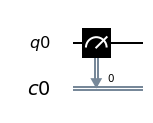

In [4]:
# Draw the circuit
single_q_measurement.draw(output='mpl')

The M gate simply measures the state of the q-bit.

In [5]:
# Execute the circuit
job = execute(single_q_measurement, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

In [6]:
# Print the result
print(result.get_counts(single_q_measurement))

{'0': 1024}


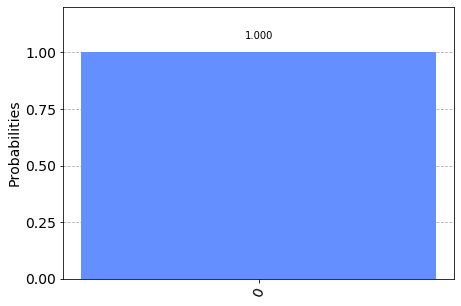

In [7]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(single_q_measurement))

All the results give 0 (fundamental state).

## Example 2

#### Q-bit flip circuit

This example uses a single qubit, putting it in the excited state $\ket{1}$ and measuring it.

In [8]:
# excited_state.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [9]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

In [10]:
# Build the circuit
excited_state = QuantumCircuit(q, c)
excited_state.x(q)

excited_state.measure(q, c)

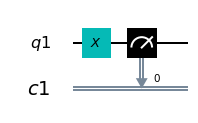

In [11]:
# Draw the circuit
excited_state.draw(output='mpl')

Here we used the X gate to put the q-bit in the excited state.

In [12]:
# Execute the circuit
job = execute(excited_state, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

In [13]:
# Print the result
print(result.get_counts(excited_state))

{'1': 1024}


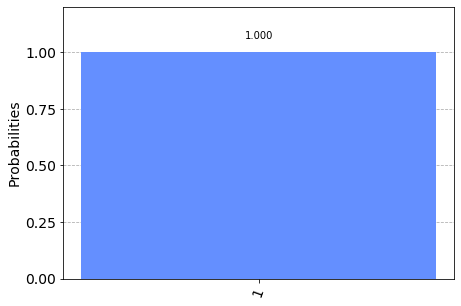

In [14]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(excited_state))

All the results give 1 (excited state).

## Example 3

#### Superpoistion

In this example, we consider a single qubit and put it in a superposition state and look at the result of performing a measurement.

In [15]:
# superposition_state.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [16]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

In [17]:
# Build the circuit
superposition_state = QuantumCircuit(q, c)
superposition_state.h(q)
superposition_state.measure(q, c)

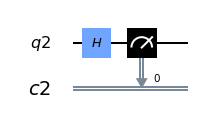

In [18]:
# Draw the circuit
superposition_state.draw(output='mpl')

H gate creates a superposition between fundamental state and excited state in the same q-bit:

$ \ket{+} = \dfrac{\ket{0} + \ket{1}}{\sqrt{2}} $ 

In [19]:
# Execute the circuit
job = execute(superposition_state, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

In [20]:
# Print the result
print(result.get_counts(superposition_state))

{'0': 508, '1': 516}


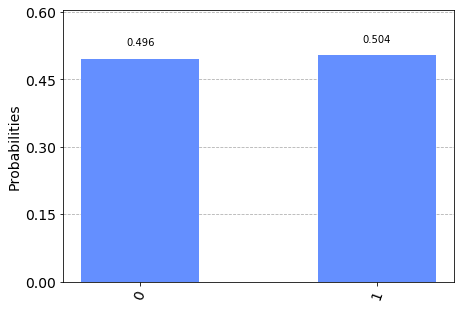

In [21]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(superposition_state))

Approximately half of the results are in the fundamental state and the other half in the excited state.

## Example 4

#### Two superpoistions

In this example, we consider a single qubit and apply the operation that puts it in a superposition state (the H gate of the previous example) twice.

We then measure its state.

In [22]:
# superposition_state_xbasis.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [23]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

In [24]:
# Build the circuit
superposition_state_xbasis = QuantumCircuit(q, c)
superposition_state_xbasis.h(q)
superposition_state_xbasis.barrier()
superposition_state_xbasis.h(q)
superposition_state_xbasis.measure(q, c)

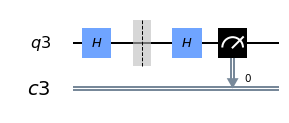

In [25]:
# Draw the circuit
superposition_state_xbasis.draw(output='mpl')

In [26]:
# Execute the circuit
job = execute(superposition_state_xbasis, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

In [27]:
# Print the result
print(result.get_counts(superposition_state_xbasis))

{'0': 1024}


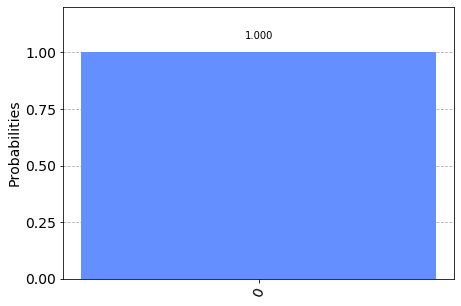

In [28]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(superposition_state_xbasis))

By putting two H gates one after the other, we obtain the original state.

## Example 5

#### Negative superpoistion

Again, we consider a single qubit.

First of all, we put in the excited state $\ket{1}$ with the X gate and then put it in a superposition state using the H gate.

Finally, we observe the result of measuring its state.

In [29]:
# negative_superposition_state.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [30]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

In [31]:
# Build the circuit
negative_superposition_state = QuantumCircuit(q, c)
negative_superposition_state.x(q)
negative_superposition_state.h(q)
negative_superposition_state.measure(q, c)

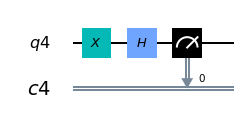

In [32]:
# Draw thecircuit
negative_superposition_state.draw(output='mpl')

We first excite the q-bit with the X gate and then create a superposition using the H gate:

X gate creates a superposition between fundamental state and excited state in the same q-bit:

$ \ket{-} = \dfrac{\ket{0} - \ket{1}}{\sqrt{2}} $ 

In [33]:
# Execute the circuit
job = execute(negative_superposition_state, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

In [34]:
# Print the result
print(result.get_counts(negative_superposition_state))

{'0': 519, '1': 505}


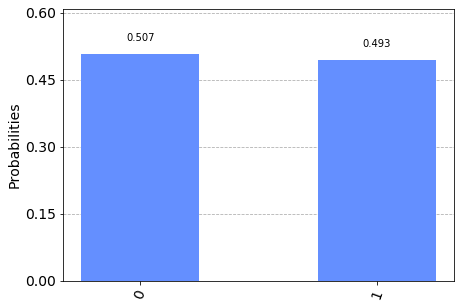

In [35]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(negative_superposition_state))

## Example 6

#### Two negative superpoistions

Similarly to exercise 4, here we apply the H gate twice to a single qubit and then measure its state.

The difference is that now the qubit was in the excited state $\ket{1}$.

In [36]:
# negative_superposition_state_xbasis.py
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer

In [37]:
# Define the Quantum and Classical Registers
q = QuantumRegister(1)
c = ClassicalRegister(1)

In [38]:
# Build the circuit
negative_superposition_state_xbasis = QuantumCircuit(q, c)
negative_superposition_state_xbasis.x(q)
negative_superposition_state_xbasis.h(q)
negative_superposition_state_xbasis.barrier()
negative_superposition_state_xbasis.h(q)
negative_superposition_state_xbasis.measure(q, c)

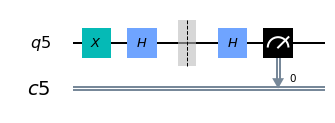

In [39]:
# Draw thecircuit
negative_superposition_state_xbasis.draw(output='mpl')

In [40]:
# Execute the circuit
job = execute(negative_superposition_state_xbasis, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()

In [41]:
# Print the result
print(result.get_counts(negative_superposition_state_xbasis))

{'1': 1024}


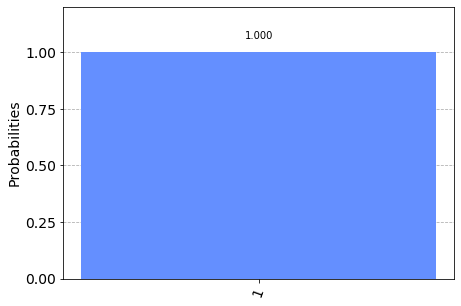

In [42]:
# Plot the result
from qiskit.visualization import plot_histogram

plot_histogram(result.get_counts(negative_superposition_state_xbasis))

## Summary

#### What we learned from the previous examples

The H gate can be represented as a matrix:

$ H = 
\dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 1 \\
    1 & -1 
\end{bmatrix}
$

If we apply H to the fundamental state $\ket{0} = \begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix}$, we obtain:

$H \ket{0} = \dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 1 \\
    1 & -1 
\end{bmatrix}
\begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix} = 
\dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 \\
    1 \\
\end{bmatrix} = 
\dfrac{\ket{0} + \ket{1}}{\sqrt{2}} = 
\ket{+}
$

Similarly, applying H to the excited state
$\ket{1} = \begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix}$, we get:

$H \ket{1} = \dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 1 \\
    1 & -1 
\end{bmatrix}
\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix} = 
\dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 \\
    -1 \\
\end{bmatrix} = 
\dfrac{\ket{0} - \ket{1}}{\sqrt{2}} = 
\ket{-}
$

Here, $\ket{+}$ and $\ket{-}$ are the representation of the superposition state in the superposition base.

When we perform a measurement to understand if the system is in the fundamental state or in the excited state, it has to *choose*, randomly, where to go, if to $\ket{0}$ or to $\ket{1}$.

This leads to the results we observed, where we found 50% systems in $\ket{0}$ and 50% in $\ket{1}$.

On the other hand, if we apply the H operator to $\ket{+}$ or $\ket{-}$, we get:

$H \ket{+} = \dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 1 \\
    1 & -1 
\end{bmatrix}
\dfrac{1}{\sqrt{2}}
\begin{bmatrix}
    1 \\
    1 \\
\end{bmatrix} = 
\dfrac{1}{2} 
\begin{bmatrix}
    2 \\
    0 \\
\end{bmatrix} = 
\begin{bmatrix}
    1 \\
    0 \\
\end{bmatrix} = \ket{0}
$

$H \ket{-} = \dfrac{1}{\sqrt{2}} 
\begin{bmatrix}
    1 & 1 \\
    1 & -1 
\end{bmatrix}
\dfrac{1}{\sqrt{2}}
\begin{bmatrix}
    1 \\
    -1 \\
\end{bmatrix} = 
\dfrac{1}{2} 
\begin{bmatrix}
    0 \\
    2 \\
\end{bmatrix} = 
\begin{bmatrix}
    0 \\
    1 \\
\end{bmatrix} = \ket{1}
$

Again, with some algebra, we can easily explain the results obtained when we applied twice the H operator: the system is always in the state it was before the double manipulation.

In other words, $HH = 1$:

$ 
HH = 
\dfrac{1}{\sqrt{2}}
\begin{bmatrix}
    1 & 1 \\
    1 & -1 
\end{bmatrix}
\dfrac{1}{\sqrt{2}}
\begin{bmatrix}
    1 & 1 \\
    1 & -1 
\end{bmatrix} = 
\dfrac{1}{2}
\begin{bmatrix}
    2 & 0 \\
    0 & 2 
\end{bmatrix} = 
\begin{bmatrix}
    1 & 0 \\
    0 & 1 
\end{bmatrix}
$

The other fundamental operator that we used is the X gate, which flips a qbit in the $\ket{0}$ state to the $\ket{1}$ state and vice-versa, when applied to a qbit in the $\ket{1}$ state moves it to the$\ket{0}$ state:

$X \ket{0} = \ket{1}$

$X \ket{1} = \ket{0}$

This means that the matrix representation of X is:

$X = 
\begin{bmatrix}
    0 & 1 \\
    1 & 0 
\end{bmatrix}$